In [330]:
from tensorflow import keras

In [331]:
import pandas as pd
df=pd.read_csv(r"C:\Users\HP\Desktop\GOT\spam.csv",encoding='latin1').drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df=df.rename(columns={'v1':'message','v2':'text'})
df

,message,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [332]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['message']=le.fit_transform(df['message'])
df

,message,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [333]:
from keras.preprocessing.text import Tokenizer

tokenizer=Tokenizer()

In [334]:
tokenizer.fit_on_texts(df['text'])

In [335]:
tokenizer.word_index
vocab=len(tokenizer.word_index)
print(vocab)

8920


In [336]:
L=[]
for sentences in df['text']:
   
    sequence=tokenizer.texts_to_sequences([sentences])[0]
    L.append(sequence)
L


[[50,
  469,
  4410,
  841,
  751,
  657,
  64,
  8,
  1324,
  89,
  121,
  349,
  1325,
  147,
  2987,
  1326,
  67,
  58,
  4411,
  144],
 [46, 336, 1495, 470, 6, 1929],
 [47,
  486,
  8,
  19,
  4,
  796,
  899,
  2,
  178,
  1930,
  1199,
  658,
  1931,
  2320,
  267,
  2321,
  71,
  1930,
  2,
  1932,
  2,
  337,
  486,
  554,
  955,
  73,
  388,
  179,
  659,
  389,
  2988],
 [6, 245, 152, 23, 379, 2989, 6, 140, 154, 57, 152],
 [1018, 1, 98, 107, 69, 487, 2, 956, 69, 1933, 218, 111, 471],
 [797,
  127,
  67,
  1683,
  145,
  108,
  160,
  1934,
  21,
  7,
  38,
  338,
  87,
  900,
  55,
  115,
  411,
  3,
  44,
  12,
  14,
  85,
  1935,
  46,
  380,
  955,
  4412,
  2,
  68,
  322,
  230,
  2,
  2990],
 [211, 11, 632, 9, 25, 55, 2, 381, 36, 10, 109, 718, 10, 55, 4413, 4414],
 [72,
  234,
  13,
  1200,
  2322,
  2323,
  1936,
  2324,
  2325,
  2326,
  798,
  119,
  108,
  608,
  72,
  13,
  1019,
  12,
  51,
  1684,
  842,
  412,
  2,
  1099,
  13,
  246,
  1019],
 [719,
  72,
  4

In [337]:
from keras.preprocessing.sequence import pad_sequences

In [338]:
max_len=max([len(x) for x in L])
max_len

189

In [339]:
processed_input=pad_sequences(L,maxlen=max_len,padding='pre')

In [340]:
processed_input.shape

(5572, 189)

In [341]:
processed_input

array([[   0,    0,    0, ...,   58, 4411,  144],
       [   0,    0,    0, ...,  470,    6, 1929],
       [   0,    0,    0, ...,  659,  389, 2988],
       ...,
       [   0,    0,    0, ...,  105,  250, 8919],
       [   0,    0,    0, ...,  200,   12,   47],
       [   0,    0,    0, ...,    2,   61,  268]])

In [342]:
print(processed_input.shape)
df['message'].shape

(5572, 189)


(5572,)

In [343]:
import pandas as pd
temp_df=pd.concat([pd.DataFrame(processed_input),df['message']],axis=1)
temp_df.shape
X=temp_df.iloc[:,:-1]
y=temp_df.iloc[:,-1]

In [344]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [346]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from keras.callbacks import EarlyStopping

In [347]:
model=Sequential()
model.add(Embedding(8921,50,input_length=189))
model.add(LSTM(50))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 189, 50)           446050    
                                                                 
 lstm_26 (LSTM)              (None, 50)                20200     
                                                                 
 dense_17 (Dense)            (None, 1)                 51        
                                                                 
Total params: 466301 (1.78 MB)
Trainable params: 466301 (1.78 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [348]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [349]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
model_training=model.fit(X_train,y_train,epochs=8,validation_split=.2,callbacks=[es])

Epoch 1/8
112/112 [==============================] - 19s 124ms/step - loss: 0.2382 - accuracy: 0.9173 - val_loss: 0.0850 - val_accuracy: 0.9787
Epoch 2/8
112/112 [==============================] - 11s 102ms/step - loss: 0.0347 - accuracy: 0.9913 - val_loss: 0.0414 - val_accuracy: 0.9865
Epoch 3/8
112/112 [==============================] - 11s 98ms/step - loss: 0.0127 - accuracy: 0.9961 - val_loss: 0.0532 - val_accuracy: 0.9854
Epoch 3: early stopping


In [350]:
score=model.evaluate(X_test,y_test)

35/35 [==============================] - 1s 37ms/step - loss: 0.0632 - accuracy: 0.9803


In [351]:
print('Test Score',score[0])
print('Test Accuracy',score[1])

Test Score 0.0632307231426239
Test Accuracy 0.9802690744400024


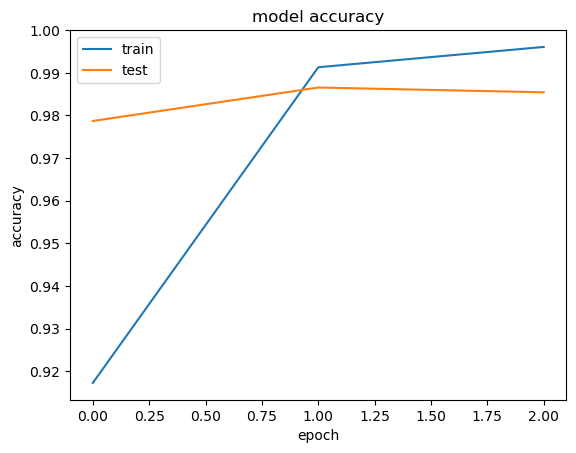

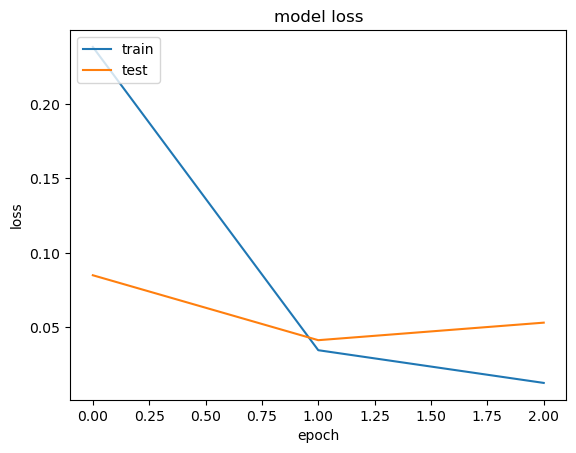

In [352]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(model_training.history['accuracy'])
plt.plot(model_training.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(model_training.history['loss'])
plt.plot(model_training.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()